In [1]:
import pandas as pd
import json
import requests
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import sys
sys.path.append("../BID/scripts/")
from generate_and_plot_baseline_metrics import *
from find_BID import *

In [2]:
########## Define BID countries ##########
africa = ['AO', 'BJ', 'BW', 'BF', 'BI', 'CM', 'CV', 'CF', 'TD', 'KM', 'CG', 'CD', 'CI', 'DJ', 'GQ', 'ER', 'ET', 'GA', 'GM', 'GH', 'GN', 'GW', 'KE', 'LS', 'LR', 'MG', 'MW', 'ML', 'MR', 'MU', 'MZ', 'NA', 'NE', 'NG', 'RW', 'ST', 'SN', 'SC', 'SL', 'SO', 'SD', 'SZ', 'TZ', 'TG', 'UG', 'ZM', 'ZW', 'SS']
pacific = ['CK', 'FJ', 'KI', 'MH', 'FM', 'NR', 'NU', 'PW', 'PG', 'WS', 'SB', 'TO', 'TV', 'VU', 'TL', 'AS', 'PF', 'GU', 'NC', 'NF', 'MP', 'PN', 'TK', 'WF', 'NZ']
caribbean = ['AG', 'BZ', 'BS', 'BB', 'CU', 'DM', 'DO', 'GD', 'GY', 'HT', 'JM', 'KN', 'LC', 'VC', 'SR', 'TT', 'AI', 'AW', 'BQ', 'KY', 'CW', 'GP', 'MQ', 'MS', 'PR', 'BL', 'MF', 'SX', 'TC', 'VG', 'VI']
total_countries = africa + pacific + caribbean

########## Get BID datasets from API ##########
BID_datasets = []
for country in total_countries+["IT", ""]:
    BID_datasets += find_BID_dataset_per_country(country, 900)

########## READ BID datasets from list ##########
# BID_datasets = pd.read_table("uuid_BID_datasets.txt", names=["uuid"])["uuid"].tolist()

In [3]:
################ Split dataset per type ################
summary_metadata = get_metadata_from_API(BID_datasets)
checklist_summary_metadata = summary_metadata[summary_metadata.type == "CHECKLIST"]
other_summary_metadata = summary_metadata[summary_metadata.type != "CHECKLIST"]

In [4]:
################ Get metadata for example dataset ################
example_datasets = example_datasets = pd.read_table("potentially_exemplary_datasets.txt", names=["uuid"])["uuid"].tolist()
summary_example_datasets = get_metadata_from_API(example_datasets)

In [5]:
################ Esthetic ################

score_names = {"score_TD" : "title and description", 
               "score_E" : "contact", 
               "score_G" : "geographic coverage", 
               "score_T" : "time coverage", 
               "score_M" : "methods"}

score_names_checklist = {"score_TD" : "title and description", 
                         "score_E" : "contact", 
                         "score_G" : "geographic coverage"}

scores = {0: '#ff8c5b', 1: '#f7e865', 2: '#8add7c'}

# Quality statistics

The example datasets are the following:
* [Asteroids, ophiuroids and holothurians from the South-Eastern Weddell Sea (Southern Ocean)](https://www.gbif.org/dataset/a6058a01-5880-41f5-9dbf-3eef8591f714)
* [Circumpolar dataset of sequenced specimens of Promachocrinus kerguelensis (Echinodermata, Crinoidea)](https://www.gbif.org/dataset/9dae1fa0-5800-4f18-8f4e-a87f05c73eb1)
* [Sightings of marine mammals carried out during oceanographic surveys in the Argentine continental shelf](https://www.gbif.org/dataset/79e731ed-fe9b-4d50-93f7-ab1f01636385)
* [Data from ILAM surveys conducted by ARCOS in Rusumo landscape for year 2016](https://www.gbif.org/dataset/5d17a4fd-7249-46c0-a56b-1924d477b29e)
* [Djamde Wildlife Reserve in Togo: diversity of woody species](https://www.gbif.org/dataset/966b3e29-f1e4-4190-badd-100bc989788f)
* [Monitoring data of marine turtles on the Togolese coast over 2012-2013 years](https://www.gbif.org/dataset/11c00ed9-1c1b-47d1-9eb4-66a491c7d7b3)
* [Bird tracking - GPS tracking of Lesser Black-backed Gulls and Herring Gulls breeding at the southern North Sea coast](https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e)

## Scoring system

### Title and description

* **Incomplete** : title or description missing

* **ok** : title and description present

* **good** : title has more than three words

### Contact

* **Incomplete** : no administrative nor technical contact

* **ok** : administrative or technical contact

* **good** : administrative or technical contact with email

### Geographic coverage

* **Incomplete** : no geographic coverage

* **ok** : bounding box or description

* **good** : bounding box and description

### Time coverage

* **Incomplete** : no time coverage

* **ok** : one date

* **good** : at least two dates (range)

### Method

* **Incomplete** : no method section

* **ok** : some method

* **good** : one paragraph for each category: sampling, study extent, quality control, method step


## Overall quality for BID datasets

### Non-checklists

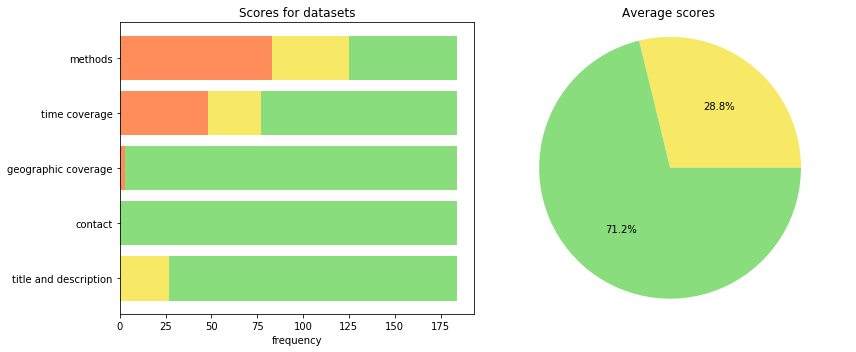

In [6]:
plot_general_scores(other_summary_metadata, score_names, scores)

### Checklist

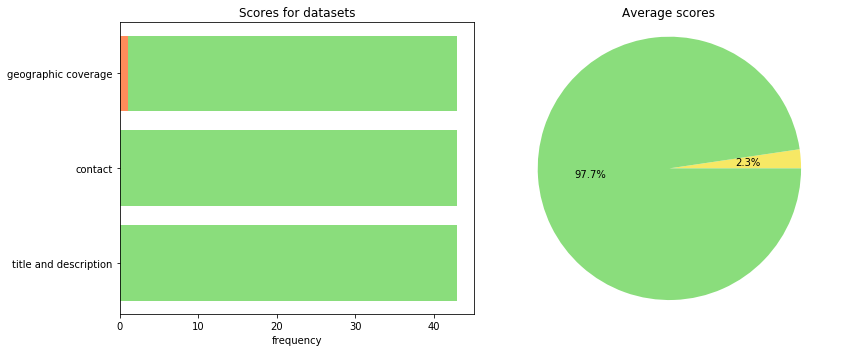

In [7]:
plot_general_scores(checklist_summary_metadata, score_names_checklist, scores)

## Quality each dataset

### Non-checklist

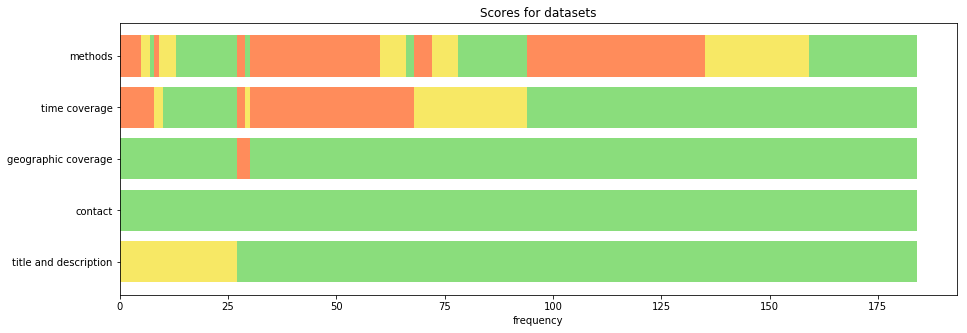

In [8]:
plot_each_dataset_score(other_summary_metadata, score_names, scores)

### Checklist

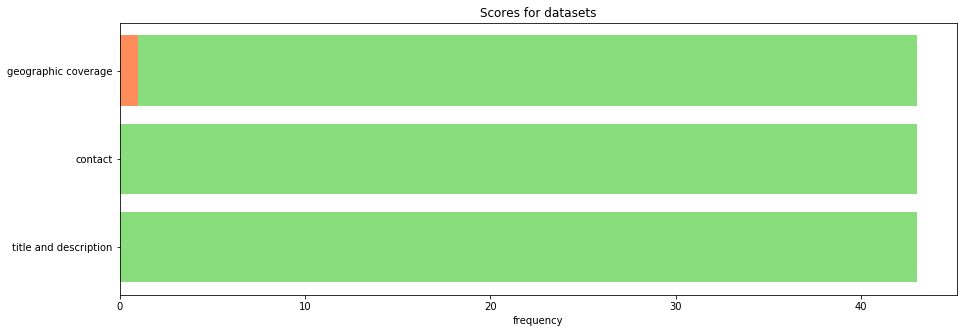

In [9]:
plot_each_dataset_score(checklist_summary_metadata, score_names_checklist, scores)